<a href="https://colab.research.google.com/github/tlysenko/cbh21-protein-solubility-challenge/blob/main/Regression_baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing the libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn import metrics

from scipy.stats import pearsonr

import matplotlib.pyplot as plt
%matplotlib inline

# Data Preparation

### Train.csv

In [27]:
root_path = '/content/drive/MyDrive/CBH/Model_0.2/'
df = pd.read_csv(root_path + 'data/train.csv')

#Features PFAM
df_pfam = pd.read_csv(root_path + 'data/features_pfam.csv')

# PhysProp features
df_pp = pd.read_csv(root_path +'data/features_phys_prop.csv')

#Protdes features
df_protdes = pd.read_csv(root_path +'data/features_protdes_combined.csv')

# Merging the data
df_main = pd.merge(df, df_pfam, on='id')
df_main = pd.merge(df_main, df_pp, on='id')
df_main = pd.merge(df_main, df_protdes, on = 'id')

df_main = df_main.fillna(0)

print('df_main',df_main.shape)
print(df_pfam.shape[1] + df_pp.shape[1] + df_protdes.shape[1])

df_main (406, 1228)
1228


### X and Y variables

In [28]:
y = df_main['solubility']
X = df_main.drop(['solubility', 'seq','id'], axis = 1)

In [4]:
print(X.shape, y.shape)

(406, 1225) (406,)


### Train-test-split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.23, random_state=42)

In [30]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)  

(312, 1225) (312,)
(94, 1225) (94,)


### Scale the data

In [7]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Model Training

In [8]:
model = LinearRegression().fit(X_train, y_train)

# Inference

In [9]:
prediction_LR = model.predict(X_test)

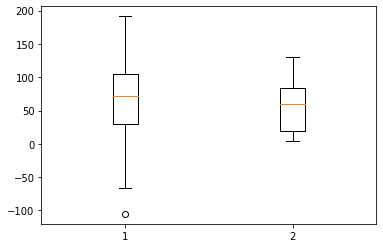

In [10]:
plt.boxplot([prediction_LR, y_test]);

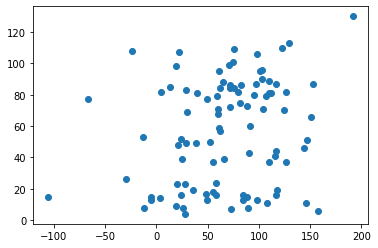

In [11]:
plt.scatter(prediction_LR, y_test);

In [12]:
prediction_LR[:100]

array([  82.71504213,    4.87606309,   61.67689391,  -23.25628563,
         48.70560936,   65.76802768,   39.96569131,  116.95153024,
         98.48704305,  115.59164306,   30.2488864 ,   19.6922038 ,
         72.57732337,  110.13209868,   61.91321331,  109.7989217 ,
         49.50916306,   60.12763864,  -13.41319278,  126.66852838,
         18.70851959,   19.55675886,   79.36006482,  157.12552009,
         58.13100357,  144.12118942,   91.22658707,   27.89405841,
        111.48886348,   94.77585814,   61.20042896,   72.2195329 ,
         98.46989312,   24.91737495,   24.0799957 ,  151.16198893,
          3.53570617,   22.05172353,   38.88650325,  100.8398163 ,
        145.80051371,   29.18407941,   49.17171783,   58.26395029,
        109.50869897,  117.95049859,  129.05765228,  116.41336871,
         59.96173189,   65.2850917 ,   90.18612497,  -66.76790534,
         29.29852896,  -12.35941449,  103.29094228,   51.85528081,
         55.49982452,   89.78168594,   71.90354144,   54.98992

In [13]:
pearsonr(prediction_LR, y_test)

(0.2247441630617983, 0.029423757312444267)

# test.csv inference

In [31]:
root_path = '/content/drive/MyDrive/CBH/Model_0.2/'
df = pd.read_csv(root_path + 'data/test.csv')
print(df.shape)

#Features PFAM
df_pfam = pd.read_csv(root_path + 'data/features_pfam.csv')

# PhysProp features
df_pp = pd.read_csv(root_path +'data/features_phys_prop.csv')

#Protdes features
df_protdes = pd.read_csv(root_path +'data/features_protdes_combined.csv')

# Merging the data
df_main = pd.merge(df, df_pfam, on='id')
print(df_main.shape)
df_main = pd.merge(df_main, df_pp, on='id')
print(df_main.shape)

df_main = pd.merge(df_main, df_protdes, on = 'id')
print(df_main.shape)

df_main = df_main.fillna(0)


print('df_main',df_main.shape)
print(df_pfam.shape[1] + df_pp.shape[1] + df_protdes.shape[1])

(659, 2)
(659, 1055)
(659, 1080)
(659, 1227)
df_main (659, 1227)
1228


In [32]:
df_main = df_main.drop(['seq', 'id'], axis = 1)

In [33]:
sc_X = StandardScaler()
sc_X.fit(X_train)
X_main = sc_X.transform(df_main)

In [34]:
final_pred = model.predict(X_main)

In [35]:
final_pred[:200]

array([-5.81598089e+00,  6.13742648e+01, -3.03643041e+00,  7.82297122e+01,
        4.96677925e+01, -9.55910876e-02,  1.16526102e+02,  6.85027355e+01,
        9.35856691e+01,  1.36562498e+02,  1.69955830e+01, -1.30022360e+01,
        1.02152613e+02,  8.98070608e+01,  1.19529343e+02,  1.38091954e+02,
        2.01193660e+01,  9.42755053e+01, -1.12363251e+01,  5.15473846e+01,
        6.45369517e+01,  9.72098759e+01,  1.81766953e+02,  2.43840260e+02,
        4.81376138e+01,  7.57345817e+00,  1.06232409e+02,  3.22949049e+01,
        1.00770693e+02,  5.41034547e+01,  2.23206444e+01, -1.13003369e+01,
        2.44698996e+00,  6.10313200e+01,  6.22277525e+01,  5.55409137e+01,
        2.59979751e+01,  5.38085643e+01,  1.05495491e+02,  2.94399879e+01,
        3.55211834e+01,  7.53151504e+01,  4.41640376e+01,  4.64976346e+01,
        1.48249958e+02,  9.36437340e+01,  6.71872522e+01,  1.21168854e+02,
        1.50348509e+02,  7.98328201e+01,  1.03402667e+02,  1.28003972e+02,
        1.17049158e+02,  

In [36]:
df_submission = pd.DataFrame( [df['id'], final_pred])
df_submission = df_submission.transpose()
df_submission.columns = ['protein','solubility']

In [37]:
df_submission.to_csv(root_path + 'predictions.csv')

In [38]:
df_submission.head()

,protein,solubility
0,P0A6K1,-5.81598
1,P76503,61.3743
2,P77215,-3.03643
3,P07639,78.2297
4,P25397,49.6678


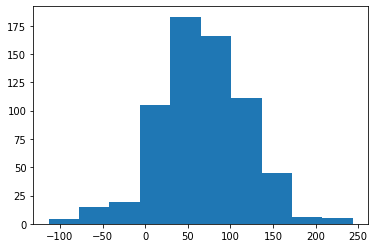

In [40]:
plt.hist(df_submission.solubility);